In [1]:
import rasterio
import numpy as np
import matplotlib as mpl
import subprocess
from matplotlib import pyplot
import geopandas as gpd
import os, math
from matplotlib import pyplot as plt

In [2]:
vn_reservoirs_path = 'vnreservoirs/VN_Reservoirs.shp'
df = gpd.read_file(vn_reservoirs_path)
plt.rcParams['figure.figsize'] = 7,7
ho_tri_an = df[df.AREA_SKM == 277.4]

## Find Rectangle that can bound!

In [3]:
from utils.landsatHepers import *

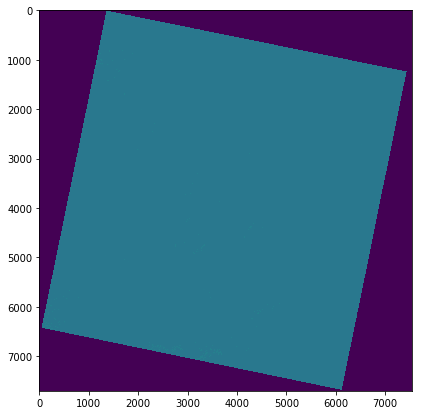

In [23]:
landsat_title = 'LC08_L1TP_124052_20170311_20170317_01_T1'
# landsat_title = 'LC08_L1TP_124052_20170530_20170615_01_T1'
geotiffPath = 'Landsat8/' + landsat_title + '/'
BQA = rasterio.open(geotiffPath + landsat_title + '_BQA.TIF')
bqa, original_transform = getMaskFromShape(ho_tri_an, BQA, eps=2000)
pyplot.imshow(BQA.read(1).squeeze())

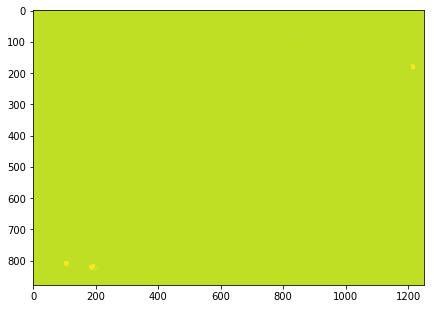

In [24]:
pyplot.imshow(bqa)

In [22]:
for x in range(bqa.shape[0]):
    for y in range(bqa.shape[1]):
        if (bqa[x, y] != 65553):
            break
x, y

(877, 0)

In [21]:
bqa[877, 1249]

65535

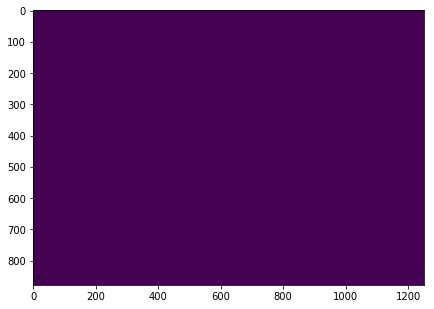

In [16]:
count = 0
_bqa = bqa
for x in range(_bqa.shape[0]):
    for y in range(_bqa.shape[1]):
        _bqa[x,y] = (1 if (_bqa[x,y] == 16) or (_bqa[x,y] == 32) else -1)
pyplot.imshow(_bqa)